In [92]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import gamma
import matplotlib.pyplot as plt

In [93]:
%cd /content/drive/MyDrive/ProbStats Project

/content/drive/.shortcut-targets-by-id/1kJWhxnlulamZ1DPy9UpGczKehz8k4kuH/ProbStats Project


In [94]:
df = pd.read_csv('cleaned_covid_cases_and_death_data.csv')

In [95]:
df.head()

,date,MT_total_cases_cum,MT_total_death_cum,MT_total_cases,MT_total_death,MN_total_cases_cum,MN_total_death_cum,MN_total_cases,MN_total_death
0,2020-01-22,0,0,0.0,0.0,0,0,0.0,0.0
1,2020-01-23,0,0,0.0,0.0,0,0,0.0,0.0
2,2020-01-24,0,0,0.0,0.0,0,0,0.0,0.0
3,2020-01-25,0,0,0.0,0.0,0,0,0.0,0.0
4,2020-01-26,0,0,0.0,0.0,0,0,0.0,0.0


In [96]:
df['daily_stats_death'] = df['MT_total_death']+df['MN_total_death']

In [97]:
df['date'] = df['date'].apply(lambda x : datetime.strptime(x, "%Y-%m-%d"))

In [98]:
total_deaths = [df[(df['date']>='2020-06-01') & (df['date']<='2020-06-28')]['daily_stats_death'], 
                df[(df['date']>='2020-06-29') & (df['date']<='2020-07-05')]['daily_stats_death'],
                df[(df['date']>='2020-06-29') & (df['date']<='2020-07-12')]['daily_stats_death'],
                df[(df['date']>='2020-06-29') & (df['date']<='2020-07-19')]['daily_stats_death'],
                df[(df['date']>='2020-06-29') & (df['date']<='2020-07-26')]['daily_stats_death']]

MAP values 
Week-1 Lambda (X-Axis) 5.959731543624161 	Confidence(Y-axis) 0.4345305575622842
Week-2 Lambda (X-Axis) 5.771812080536913 	Confidence(Y-axis) 0.6230489705440925
Week-3 Lambda (X-Axis) 5.959731543624161 	Confidence(Y-axis) 0.748060442642361
Week-4 Lambda (X-Axis) 6.100671140939598 	Confidence(Y-axis) 0.8559050696700943


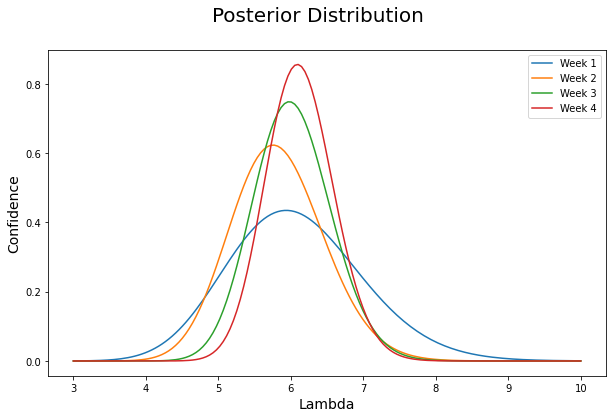

In [99]:
## Initial beta calculation for the prior
lambda_mme = np.mean(total_deaths[0])
# taking from lambda_mme
beta = lambda_mme

x = np.linspace(3, 10, 150) 
y=[]
fig = plt.figure(figsize=(10,6))
fig.suptitle('Posterior Distribution', fontsize=20)
plt.xlabel('Lambda', fontsize=14)
plt.ylabel('Confidence', fontsize=14)
print("MAP values ")
for i in range(len(total_deaths)-1):
  # computing posterior for each week.
  alpha = np.sum(total_deaths[i+1]) + 1
  scale = 1.0/((i+1)*7 + 1.0/beta)
  y.append(gamma.pdf(x, a=alpha, scale = scale ))
  #print('MAP for week ',i+1,np.max(y[i]))
  print("Week-"+str(i+1),"Lambda (X-Axis)",x[np.argmax(y[i])],"\tConfidence(Y-axis)",np.max(y[i]))
  plt.plot(x, y[i], label=('Week '+str(i+1)))
plt.legend()
plt.show()

1. The above graphs shows that after week 1 as the weeks progresses, the number of deaths are increasing and thus the MAP for the Lambda parameter is increasing.
2. Confidence in MAP value is increasing as the weeks are increasing.